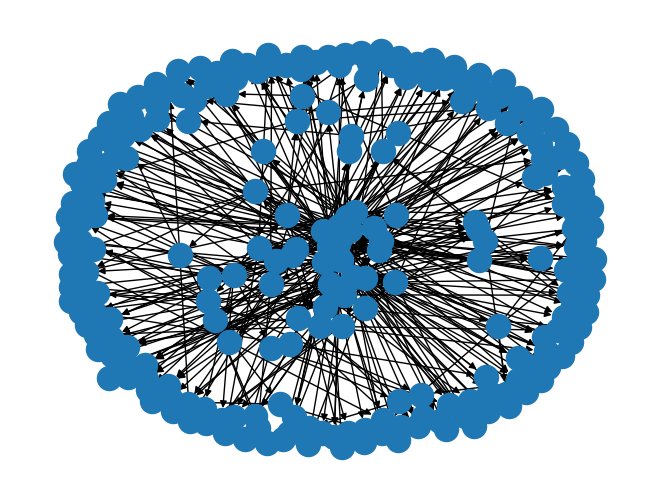

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
G = nx.read_graphml('kg.graphml')
nx.draw(G)
plt.show()

In [3]:
for node in G.nodes(data=True):
    print(node)

('water', {})
('earth', {})
('fire', {})
('air', {})
('water_and_earth', {})
('mud', {})
('mud_and_water', {})
('clay', {})
('mud_and_earth', {})
('fossil', {})
('clay_and_water', {})
('ceramic', {})
('clay_and_earth', {})
('terracotta', {})
('fossil_and_water', {})
('amber', {})
('fossil_and_earth', {})
('petrified wood', {})
('ceramic_and_water', {})
('glazed pottery', {})
('ceramic_and_earth', {})
('earthenware', {})
('amber_and_water', {})
('resin', {})
('amber_and_earth', {})
('preserved fossil', {})
('petrified wood_and_water', {})
('fossilized leaf', {})
('petrified wood_and_earth', {})
('petrified tree', {})
('glazed pottery_and_water', {})
('enamelware', {})
('earthenware_and_water', {})
('porcelain', {})
('resin_and_water', {})
('varnish', {})
('resin_and_earth', {})
('amberstone', {})
('fire_and_water', {})
('steam', {})
('steam_and_water', {})
('cloud', {})
('steam_and_fire', {})
('energy', {})
('water_and_air', {})
('mist', {})
('mist_and_water', {})
('dew', {})
('mist_and

In [11]:
import networkx as nx

def load_graph(graph_file: str) -> nx.MultiDiGraph:
    """
    Load a graph from a GraphML file.
    """
    try:
        graph = nx.read_graphml(graph_file)
        print(f"Graph loaded from {graph_file} with {graph.number_of_nodes()} nodes and {graph.number_of_edges()} edges.")
        return graph
    except Exception as e:
        print(f"Error loading graph: {e}")
        exit(1)

def compute_distance(graph: nx.MultiDiGraph, source: str, target: str) -> int:
    """
    Compute the shortest path length (number of edges/ hops) from source to target.
    Returns the distance if a path exists, and raises an exception if not.
    """
    try:
        # For a MultiDiGraph, nx.shortest_path_length works fine (it counts edges)
        distance = nx.shortest_path_length(graph, source=source, target=target)
        return distance
    except nx.NetworkXNoPath:
        raise ValueError(f"No path exists between '{source}' and '{target}'")
    except nx.NodeNotFound as e:
        raise ValueError(e)

def main():
    # Assumes the graph is saved as 'kg.graphml' in the current directory.
    graph_file = "kg.graphml"
    graph = load_graph(graph_file)

    print("\nEnter the name of the source node and target node to calculate the distance.")
    source = "water"
    target = "silken soil"

    try:
        distance = compute_distance(graph, source, target)
        print(f"\nThe shortest distance from '{source}' to '{target}' is {distance} edge(s).")
    except ValueError as ve:
        print(f"\nError: {ve}")


In [12]:
if __name__ == "__main__":
    main()

Graph loaded from kg.graphml with 242 nodes and 396 edges.

Enter the name of the source node and target node to calculate the distance.

The shortest distance from 'water' to 'silken soil' is 4 edge(s).


In [3]:
import networkx as nx

# Convert to an undirected graph to ensure connectivity issues are avoided.
graph = nx.read_graphml("kg.graphml")
undirected_graph = graph.to_undirected()

best_pair = None
max_distance = -1

# Process component-by-component
for component in nx.connected_components(undirected_graph):
    subgraph = undirected_graph.subgraph(component)
    
    # Use all_pairs_shortest_path_length on the component.
    for source, lengths in nx.all_pairs_shortest_path_length(subgraph):
        for target, distance in lengths.items():
            if distance > max_distance:
                max_distance = distance
                best_pair = (source, target)
                
print(f"\nBest pair: {best_pair} \nMax distance: {max_distance}")



Best pair: ('mudspire', 'glass') 
Max distance: 8
